# Intermediate Importing Data in Python

## Course Description
As a data scientist, you will need to clean data, wrangle and munge it, visualize it, build predictive models and interpret these models. Before you can do so, however, you will need to know how to get data into Python. In the prequel to this course, you learned many ways to import data into Python: from flat files such as .txt and .csv; from files native to other software such as Excel spreadsheets, Stata, SAS, and MATLAB files; and from relational databases such as SQLite and PostgreSQL. In this course, you'll extend this knowledge base by learning to import data from the web and by pulling data from Application Programming Interfaces— APIs—such as the Twitter streaming API, which allows us to stream real-time tweets.

## 3. Diving deep into the Twitter API
In this chapter, you will consolidate your knowledge of interacting with APIs in a deep dive into the Twitter streaming API. You'll learn how to stream real-time Twitter data, and how to analyze and visualize it.

### API Authentication
The package tweepy is great at handling all the Twitter API OAuth Authentication details for you. All you need to do is pass it your authentication credentials. In this interactive exercise, we have created some mock authentication credentials (if you wanted to replicate this at home, you would need to create a Twitter App as Hugo detailed in the video). Your task is to pass these credentials to tweepy's OAuth handler.

<b>Instructions</b>
- Import the package tweepy.
- Pass the parameters consumer_key and consumer_secret to the function tweepy.OAuthHandler().
- Complete the passing of OAuth credentials to the OAuth handler auth by applying to it the method set_access_token(), along with arguments access_token and access_token_secret.

In [7]:
# Import package
import tweepy, json

# Store OAuth authentication credentials in relevant variables
access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

### Streaming tweets
Now that you have set up your authentication credentials, it is time to stream some tweets! We have already defined the tweet stream listener class, MyStreamListener, just as Hugo did in the introductory video. You can find the code for the tweet stream listener class here.

Your task is to create the Streamobject and to filter tweets according to particular keywords.

<b>Instructions</b>
- Create your Stream object with authentication by passing tweepy.Stream() the authentication handler auth and the Stream listener l;
- To filter Twitter streams, pass to the track argument in stream.filter() a list containing the desired keywords 'clinton', 'trump', 'sanders', and 'cruz'.

In [ ]:
# Initialize Stream listener
l = MyStreamListener()

# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)

# Filter Twitter Streams to capture data by the keywords:
stream.filter(['clinton', 'trump', 'sanders', 'cruz'])

### Load and explore your Twitter data
Now that you've got your Twitter data sitting locally in a text file, it's time to explore it! This is what you'll do in the next few interactive exercises. In this exercise, you'll read the Twitter data into a list: tweets_data.

Be aware that this is real data from Twitter and as such there is always a risk that it may contain profanity or other offensive content (in this exercise, and any following exercises that also use real Twitter data).

<b>Instructions</b>
- Assign the filename 'tweets.txt' to the variable tweets_data_path.
- Initialize tweets_data as an empty list to store the tweets in.
- Within the for loop initiated by for line in tweets_file:, load each tweet into a variable, tweet, using json.loads(), then append tweet to tweets_data using the append() method.
- Hit submit and check out the keys of the first tweet dictionary printed to the shell.

In [10]:
# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = 'datasets/tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

dict_keys(['in_reply_to_user_id', 'created_at', 'filter_level', 'truncated', 'possibly_sensitive', 'timestamp_ms', 'user', 'text', 'extended_entities', 'in_reply_to_status_id', 'entities', 'favorited', 'retweeted', 'is_quote_status', 'id', 'favorite_count', 'retweeted_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str', 'in_reply_to_screen_name', 'coordinates', 'lang', 'place', 'contributors', 'geo', 'retweet_count', 'source'])


### Twitter data to DataFrame
Now you have the Twitter data in a list of dictionaries, tweets_data, where each dictionary corresponds to a single tweet. Next, you're going to extract the text and language of each tweet. The text in a tweet, t1, is stored as the value t1['text']; similarly, the language is stored in t1['lang']. Your task is to build a DataFrame in which each row is a tweet and the columns are 'text' and 'lang'.

<b>Instructions</b>
- Use pd.DataFrame() to construct a DataFrame of tweet texts and languages; to do so, the first argument should be tweets_data, a list of dictionaries. The second argument to pd.DataFrame() is a list of the keys you wish to have as columns. Assign the result of the pd.DataFrame() call to df.
- Print the head of the DataFrame.

In [11]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text','lang'])

# Print head of DataFrame
print(df.head())

                                                text lang
0  RT @bpolitics: .@krollbondrating's Christopher...   en
1  RT @HeidiAlpine: @dmartosko Cruz video found.....   en
2  Njihuni me Zonjën Trump !!! | Ekskluzive https...   et
3  Your an idiot she shouldn't have tried to grab...   en
4  RT @AlanLohner: The anti-American D.C. elites ...   en


A little bit of Twitter text analysis
Now that you have your DataFrame of tweets set up, you're going to do a bit of text analysis to count how many tweets contain the words 'clinton', 'trump', 'sanders' and 'cruz'. In the pre-exercise code, we have defined the following function word_in_text(), which will tell you whether the first argument (a word) occurs within the 2nd argument (a tweet).

``` python
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False
```

You're going to iterate over the rows of the DataFrame and calculate how many tweets contain each of our keywords! The list of objects for each candidate has been initialized to 0.

<b>Instructions</b>
- Within the for loop for index, row in df.iterrows():, the code currently increases the value of clinton by 1 each time a tweet (text row) mentioning 'Clinton' is encountered; complete the code so that the same happens for trump, sanders and cruz.

In [ ]:
# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])

### Plotting your Twitter data
Now that you have the number of tweets that each candidate was mentioned in, you can plot a bar chart of this data. You'll use the statistical data visualization library seaborn, which you may not have seen before, but we'll guide you through. You'll first import seaborn as sns. You'll then construct a barplot of the data using sns.barplot, passing it two arguments:

a list of labels and
a list containing the variables you wish to plot (clinton, trump and so on.)
Hopefully, you'll see that Trump was unreasonably represented! We have already run the previous exercise solutions in your environment.

<b>Instructions</b>
- Import both matplotlib.pyplot and seaborn using the aliases plt and sns, respectively.
- Complete the arguments of sns.barplot:
- The first argument should be the list of labels to appear on the x-axis (created in the previous step).
- The second argument should be a list of the variables you wish to plot, as produced in the previous exercise (i.e. a list containing clinton, trump, etc).

C:\Users\Safeway\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


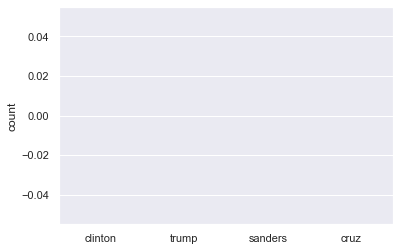

In [14]:
# Import packages
import seaborn as sns
import matplotlib.pyplot as plt


# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot the bar chart
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()